In [1]:

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import seaborn as sns
from sklearn import preprocessing
import plotly.express as px
import plotly.graph_objects as go
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer


In [2]:
# Load your CSV file into a DataFrame
df = pd.read_csv('Helps Us Help You_ Mental & Emotional Wellbeing Survey  (Responses).csv')




In [3]:
df.head()

,Timestamp,Email address,Gender,Age (in Years),"1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ?",2.Have you experienced any of the following symptoms lately ?,3.How often do you find yourself thinking about what happened?,4. Do you feel comfortable talking about what you're going through ?,5. Are you currently seeking support or professional help for your mental health ?,6.Which of the following coping strategies have you tried? Please select all that apply,...,8. Are there any specific triggers or situations that make your symptoms worse?,9. How do you usually handle stress or difficult emotions ?,10. What kind of support do you feel you need most right now?,11. Did you ever have suicidal thoughts in last 1 year ?,12. You feel sad and low ?,13. You feel disinterested in things that earlier seemed pleasurable ?,14. You have difficulty making decisions,15. You feel tired and low on energy,16. You believe that nothing will ever work out for me,17. How long you feel above selected conditions of your mental health ?
0,4/13/2024 13:23:26,fatma.sia2020@gmail.com,Female,21,5 - 6 (Moderate),"Difficulty Sleeping, Persistent sadness, Hopel...",Frequently,Yes,Yes,"Talking to friends or family, Seeking professi...",...,Yes,Avoidance,Emotional support,No,Some of the time,Some of the time,Never,Hardly ever,Never,Between Three Month to Six Month
1,4/13/2024 13:26:44,shikhawizard111@gmail.com,Female,26,7 - 8 ( High ),Hopelessness,Occasionlly,No,No,"Mindfulness or meditation, Staying Alone",...,Yes,Engaging in activities I enjoy,Practical help with daily tasks,No,Some of the time,Most of the time,Some of the time,Some of the time,Some of the time,Between Three Month to Six Month
2,4/13/2024 13:35:20,shreyashankar5336@gmail.com,Female,22,3 - 4 ( Low ),"Difficulty Sleeping, Loss of appetite, Persist...",Frequently,Yes,No,"Talking to friends or family, Exercising, Stay...",...,No,Avoidance,Emotional support,Sometimes,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Greater than Six Month
3,4/13/2024 13:53:37,amansamastipur123@gmail.com,Male,23,7 - 8 ( High ),Difficulty Sleeping,Occasionlly,Yes,No,Talking to friends or family,...,No,Engaging in activities I enjoy,Professional guidance,No,Hardly ever,Some of the time,Some of the time,Hardly ever,Some of the time,Greater than Six Month
4,4/13/2024 13:53:54,pranavraj0203@gmail.com,Male,23,7 - 8 ( High ),"Difficulty Sleeping, Hopelessness",Frequently,No,No,"Talking to friends or family, Exercising, Stay...",...,No,Engaging in activities I enjoy,Someone to listen without judgment,Sometimes,Some of the time,Some of the time,Some of the time,Some of the time,Most of the time,Greater than Six Month


In [4]:
df.drop(['Timestamp','Email address'],axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age (in Years),"1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ?",2.Have you experienced any of the following symptoms lately ?,3.How often do you find yourself thinking about what happened?,4. Do you feel comfortable talking about what you're going through ?,5. Are you currently seeking support or professional help for your mental health ?,6.Which of the following coping strategies have you tried? Please select all that apply,7. How has your daily functioning been affected by what you're going through ?,8. Are there any specific triggers or situations that make your symptoms worse?,9. How do you usually handle stress or difficult emotions ?,10. What kind of support do you feel you need most right now?,11. Did you ever have suicidal thoughts in last 1 year ?,12. You feel sad and low ?,13. You feel disinterested in things that earlier seemed pleasurable ?,14. You have difficulty making decisions,15. You feel tired and low on energy,16. You believe that nothing will ever work out for me,17. How long you feel above selected conditions of your mental health ?
0,Female,21,5 - 6 (Moderate),"Difficulty Sleeping, Persistent sadness, Hopel...",Frequently,Yes,Yes,"Talking to friends or family, Seeking professi...",Moderately impaired,Yes,Avoidance,Emotional support,No,Some of the time,Some of the time,Never,Hardly ever,Never,Between Three Month to Six Month
1,Female,26,7 - 8 ( High ),Hopelessness,Occasionlly,No,No,"Mindfulness or meditation, Staying Alone",Moderately impaired,Yes,Engaging in activities I enjoy,Practical help with daily tasks,No,Some of the time,Most of the time,Some of the time,Some of the time,Some of the time,Between Three Month to Six Month
2,Female,22,3 - 4 ( Low ),"Difficulty Sleeping, Loss of appetite, Persist...",Frequently,Yes,No,"Talking to friends or family, Exercising, Stay...",Not impaired,No,Avoidance,Emotional support,Sometimes,Most of the time,Most of the time,Most of the time,Most of the time,Most of the time,Greater than Six Month
3,Male,23,7 - 8 ( High ),Difficulty Sleeping,Occasionlly,Yes,No,Talking to friends or family,Slightly impaired,No,Engaging in activities I enjoy,Professional guidance,No,Hardly ever,Some of the time,Some of the time,Hardly ever,Some of the time,Greater than Six Month
4,Male,23,7 - 8 ( High ),"Difficulty Sleeping, Hopelessness",Frequently,No,No,"Talking to friends or family, Exercising, Stay...",Slightly impaired,No,Engaging in activities I enjoy,Someone to listen without judgment,Sometimes,Some of the time,Some of the time,Some of the time,Some of the time,Most of the time,Greater than Six Month


In [6]:
df.isnull().sum()

Gender                                                                                     0
Age (in Years)                                                                             0
1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ?     0
2.Have you experienced any of the following symptoms lately ?                              0
3.How often do you find yourself thinking about what happened?                             0
4. Do you feel comfortable talking about what you're going through ?                       0
5. Are you currently seeking support or professional help for your mental health ?         0
6.Which of the following coping strategies have you tried? Please select all that apply    0
7. How has your daily functioning been affected by what you're going through ?             0
8. Are there any specific triggers or situations that make your symptoms worse?            0
9. How do you usually handle stress or difficult emotions ?           

In [7]:
df.duplicated().sum()

0

In [8]:
df['Gender '].value_counts()

Gender 
Male      76
Female    25
Name: count, dtype: int64

In [9]:
label_encode=LabelEncoder()

In [10]:
labelss=label_encode.fit_transform(df['Gender '])

In [11]:
print(labelss)

[0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0]


In [12]:
df['Gender ']=labelss

In [13]:
df['Gender '].value_counts()

Gender 
1    76
0    25
Name: count, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 19 columns):
 #   Column                                                                                   Non-Null Count  Dtype 
---  ------                                                                                   --------------  ----- 
 0   Gender                                                                                   101 non-null    int64 
 1   Age (in Years)                                                                           101 non-null    int64 
 2   1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ?   101 non-null    object
 3   2.Have you experienced any of the following symptoms lately ?                            101 non-null    object
 4   3.How often do you find yourself thinking about what happened?                           101 non-null    object
 5   4. Do you feel comfortable talking about what you're going through ?   

In [15]:
df['Age (in Years)'].value_counts()

Age (in Years)
22    28
23    26
21    20
20     9
19     8
24     6
18     2
26     1
25     1
Name: count, dtype: int64

In [16]:
df['1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? '].value_counts()

1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? 
5 - 6 (Moderate)        52
7 - 8 ( High )          23
3 - 4 ( Low )           11
9 - 10 ( Very High )     9
1 - 2 ( Very Low )       6
Name: count, dtype: int64

In [17]:
labels=label_encode.fit_transform(df['1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? '])
print(labels)
df['1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? ']=labels
#df

[2 3 1 3 3 3 2 2 2 2 2 3 2 2 2 0 1 2 3 2 2 2 2 1 4 1 4 3 3 2 1 2 3 3 2 2 2
 2 2 3 2 4 2 2 2 2 4 4 2 1 2 4 2 4 2 4 1 2 2 2 2 3 2 3 2 2 3 3 2 4 2 1 0 0
 1 1 0 2 0 3 0 2 2 2 3 3 2 3 2 3 1 2 2 3 2 3 2 2 3 2 2]


In [18]:
df['1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? '].value_counts()

1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? 
2    52
3    23
1    11
4     9
0     6
Name: count, dtype: int64

In [19]:
df['2.Have you experienced any of the following symptoms lately ?'].value_counts()

2.Have you experienced any of the following symptoms lately ?
Difficulty Sleeping                                                                             20
Difficulty Sleeping, Loss of appetite, Persistent sadness, Hopelessness, Irritability, Anger    11
Irritability                                                                                    11
Hopelessness                                                                                     8
Anger                                                                                            6
Difficulty Sleeping, Persistent sadness, Hopelessness, Irritability, Anger                       4
Persistent sadness                                                                               4
Loss of appetite                                                                                 3
Difficulty Sleeping, Hopelessness, Irritability, Anger                                           3
Irritability, Anger                            

In [20]:
labels=label_encode.fit_transform(df['2.Have you experienced any of the following symptoms lately ?'])
print(labels)
df['2.Have you experienced any of the following symptoms lately ?']=labels

[16 17 12  1  2 12 20 10 16 27 21  0 21 17 22 12 28  1 17 29  0  0 23 25
 12 19  1 21  2  1 26 20  1 23  3 25  1 16  4  0 15  1  1  6 16 12  1 12
 24 12  1  1  1  1  5 21 18 22  1 30  1 21  1 21  1 17  1  0 23 21 28 30
 12 12 27  9 12 14 12 21 13  0  6 11 17 21  4  7 17  1  4 22 25 21 17 17
 21 25  1  8  8]


In [21]:
df['2.Have you experienced any of the following symptoms lately ?'].value_counts()

2.Have you experienced any of the following symptoms lately ?
1     20
12    11
21    11
17     8
0      6
16     4
25     4
23     3
4      3
22     3
30     2
6      2
8      2
2      2
27     2
20     2
28     2
29     1
7      1
11     1
13     1
14     1
9      1
5      1
18     1
24     1
15     1
10     1
3      1
26     1
19     1
Name: count, dtype: int64

In [22]:
df['3.How often do you find yourself thinking about what happened?'].value_counts()

3.How often do you find yourself thinking about what happened?
Frequently     33
Occasionlly    30
Rarely         25
Constantly     13
Name: count, dtype: int64

In [23]:
labels=label_encode.fit_transform(df['3.How often do you find yourself thinking about what happened?'])
print(labels)
df['3.How often do you find yourself thinking about what happened?']=labels

[1 2 1 2 1 0 2 2 1 2 1 0 2 2 2 1 1 3 3 2 1 3 3 3 0 2 3 1 2 2 1 1 1 2 1 1 3
 2 2 3 0 3 3 1 1 0 1 2 1 2 1 3 1 1 0 3 1 2 3 3 2 3 2 3 0 1 3 2 1 3 1 0 0 0
 1 0 1 2 0 1 0 1 2 3 2 1 3 2 3 3 1 2 2 1 2 2 1 2 3 3 3]


In [24]:
df['3.How often do you find yourself thinking about what happened?'].value_counts()

3.How often do you find yourself thinking about what happened?
1    33
2    30
3    25
0    13
Name: count, dtype: int64

In [25]:
df['5. Are you currently seeking support or professional help for your mental health ? '].value_counts()

5. Are you currently seeking support or professional help for your mental health ? 
No                    84
Yes                   10
I'm considering it     7
Name: count, dtype: int64

In [26]:
labels=label_encode.fit_transform(df['5. Are you currently seeking support or professional help for your mental health ? '])
print(labels)
df['5. Are you currently seeking support or professional help for your mental health ? ']=labels

[2 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 2 1 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 1 0 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 0]


In [27]:
df['5. Are you currently seeking support or professional help for your mental health ? '].value_counts()

5. Are you currently seeking support or professional help for your mental health ? 
1    84
2    10
0     7
Name: count, dtype: int64

In [28]:
df["4. Do you feel comfortable talking about what you're going through ?"].value_counts()

4. Do you feel comfortable talking about what you're going through ?
Yes    51
No     50
Name: count, dtype: int64

In [29]:
labels=label_encode.fit_transform(df["4. Do you feel comfortable talking about what you're going through ?"])
print(labels)
df["4. Do you feel comfortable talking about what you're going through ?"]=labels

[1 0 1 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 1 0 1 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 0 1 0]


In [30]:
df["4. Do you feel comfortable talking about what you're going through ?"].value_counts()

4. Do you feel comfortable talking about what you're going through ?
1    51
0    50
Name: count, dtype: int64

In [31]:
df['6.Which of the following coping strategies have you tried? Please select all that apply'].value_counts()

6.Which of the following coping strategies have you tried? Please select all that apply
Staying Alone                                                                                                                15
Talking to friends or family                                                                                                 12
Talking to friends or family, Staying Alone                                                                                  11
Talking to friends or family, Exercising                                                                                     10
Talking to friends or family, Exercising, Staying Alone                                                                       9
Talking to friends or family, Exercising, Mindfulness or meditation                                                           7
Exercising                                                                                                                    7
Exercising, Stay

In [32]:
labels=label_encode.fit_transform(df['6.Which of the following coping strategies have you tried? Please select all that apply'])
print(labels)
df['6.Which of the following coping strategies have you tried? Please select all that apply']=labels

[21  7 16  9 16  8  3 15 16  1 22 11  8 13 16  8 22  9  9  9 22 10  9  8
  8  9 13  6 17 10  9  8 12 10  0  8 10  7 22  7 19  4  0  9 18 10  9 15
 13  8 20  8 22  5  8 13  8  0 22  4  9  0  8 10 19 13 16 16 16  2  8  4
  8 20  7 19  9 13 22 10  4  0  3 12  3 22 22 10 10  0 16 14  8  9 22 13
 22  0  2 10 16]


In [33]:
df['6.Which of the following coping strategies have you tried? Please select all that apply'].value_counts()

6.Which of the following coping strategies have you tried? Please select all that apply
8     15
9     12
22    11
10    10
16     9
13     7
0      7
4      4
7      4
3      3
19     3
15     2
2      2
20     2
12     2
5      1
18     1
21     1
17     1
6      1
11     1
1      1
14     1
Name: count, dtype: int64

In [34]:
df["7. How has your daily functioning been affected by what you're going through ? "].value_counts()

7. How has your daily functioning been affected by what you're going through ? 
Slightly impaired         34
Moderately impaired       29
Not impaired              23
Significantly impaired    15
Name: count, dtype: int64

In [35]:
labels=label_encode.fit_transform(df["7. How has your daily functioning been affected by what you're going through ? "])
print(labels)
df["7. How has your daily functioning been affected by what you're going through ? "]=labels

[0 0 1 3 3 0 1 0 1 0 3 2 3 3 3 2 2 0 1 2 3 0 0 2 1 3 1 3 1 1 0 3 0 3 0 1 3
 3 1 3 0 1 0 3 0 2 0 0 0 2 3 1 3 3 1 1 3 2 3 1 0 0 2 1 0 0 3 3 0 2 0 0 2 2
 0 3 0 3 1 2 2 3 1 2 0 3 3 3 3 3 0 1 3 1 3 1 0 3 1 1 3]


In [36]:
df["7. How has your daily functioning been affected by what you're going through ? "].value_counts()

7. How has your daily functioning been affected by what you're going through ? 
3    34
0    29
1    23
2    15
Name: count, dtype: int64

In [37]:
df['8. Are there any specific triggers or situations that make your symptoms worse?'].value_counts()

8. Are there any specific triggers or situations that make your symptoms worse?
No              44
I'm not sure    29
Yes             28
Name: count, dtype: int64

In [38]:
labels=label_encode.fit_transform(df['8. Are there any specific triggers or situations that make your symptoms worse?'])
print(labels)
df['8. Are there any specific triggers or situations that make your symptoms worse?']=labels

[2 2 1 1 1 2 0 1 1 2 0 2 1 1 1 2 0 2 1 0 2 2 0 0 2 2 1 0 1 1 2 2 2 0 0 0 1
 1 0 1 0 1 0 0 1 2 1 2 0 0 2 1 0 0 0 1 1 1 2 1 1 0 1 1 2 1 1 1 1 1 2 2 2 2
 0 2 1 0 2 2 1 1 1 1 0 1 0 0 0 1 2 1 0 1 0 1 2 1 1 1 0]


In [39]:
df['8. Are there any specific triggers or situations that make your symptoms worse?'].value_counts()

8. Are there any specific triggers or situations that make your symptoms worse?
1    44
0    29
2    28
Name: count, dtype: int64

In [40]:
df['9. How do you usually handle stress or difficult emotions ?'].value_counts()

9. How do you usually handle stress or difficult emotions ?
Engaging in activities I enjoy    56
Avoidance                         26
Meditation                        11
Seeking support from others        8
Name: count, dtype: int64

In [41]:
labels=label_encode.fit_transform(df['9. How do you usually handle stress or difficult emotions ?'])
print(labels)
df['9. How do you usually handle stress or difficult emotions ?']=labels

[0 1 0 1 1 0 1 2 1 1 1 0 1 1 1 0 0 0 1 3 1 3 1 1 0 1 1 2 1 1 2 0 1 1 1 1 1
 2 3 2 0 1 1 1 1 0 0 3 3 0 1 2 0 0 1 1 1 1 1 0 1 1 1 2 3 1 1 1 3 2 0 1 0 0
 1 1 0 1 1 3 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 2 1 0 2 2 1]


In [42]:
df['9. How do you usually handle stress or difficult emotions ?'].value_counts()

9. How do you usually handle stress or difficult emotions ?
1    56
0    26
2    11
3     8
Name: count, dtype: int64

In [43]:
df['10. What kind of support do you feel you need most right now?'].value_counts()

10. What kind of support do you feel you need most right now?
Practical help with daily tasks       35
Someone to listen without judgment    27
Emotional support                     26
Professional guidance                 13
Name: count, dtype: int64

In [44]:
labels=label_encode.fit_transform(df['10. What kind of support do you feel you need most right now?'])
print(labels)
df['10. What kind of support do you feel you need most right now?']=labels

[0 1 0 2 3 0 3 3 2 3 3 2 3 1 3 0 0 0 0 0 3 0 1 3 3 1 3 1 1 2 3 2 0 1 0 3 2
 1 3 0 1 2 1 0 0 1 0 0 1 0 1 3 3 3 1 1 2 0 3 1 1 2 1 3 1 3 0 3 1 3 0 1 0 1
 0 3 1 1 3 2 0 1 1 1 1 1 0 1 0 1 0 1 1 3 2 1 3 2 2 1 3]


In [45]:
df['10. What kind of support do you feel you need most right now?'].value_counts()

10. What kind of support do you feel you need most right now?
1    35
3    27
0    26
2    13
Name: count, dtype: int64

In [46]:
df['11. Did you ever have suicidal thoughts in last 1 year ?'].value_counts()

11. Did you ever have suicidal thoughts in last 1 year ?
No           77
Yes          18
Sometimes     6
Name: count, dtype: int64

In [47]:
labels=label_encode.fit_transform(df['11. Did you ever have suicidal thoughts in last 1 year ?'])
print(labels)
df['11. Did you ever have suicidal thoughts in last 1 year ?']=labels

[0 0 1 0 1 2 2 0 0 2 0 2 0 0 0 0 1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 2 2 0 0 0 0
 0 1 0 2 0 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2
 0 2 2 1 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [48]:
df['11. Did you ever have suicidal thoughts in last 1 year ?'].value_counts()

11. Did you ever have suicidal thoughts in last 1 year ?
0    77
2    18
1     6
Name: count, dtype: int64

In [49]:
df['12. You feel sad and low ?'].value_counts()

12. You feel sad and low ?
Some of the time    53
Most of the time    18
Hardly ever         17
Never                8
All the time         5
Name: count, dtype: int64

In [50]:
labels=label_encode.fit_transform(df['12. You feel sad and low ?'])
print(labels)
df['12. You feel sad and low ?']=labels

[4 4 2 1 4 4 4 2 4 4 2 0 4 1 4 0 2 3 4 4 4 1 1 2 3 4 3 1 4 3 2 2 4 1 2 1 4
 1 2 1 1 3 1 2 4 2 4 4 4 4 4 3 4 4 4 4 2 3 2 4 4 3 4 1 0 4 1 4 4 1 2 2 0 2
 4 4 2 4 0 4 4 4 4 1 4 4 1 4 4 4 4 4 4 4 2 4 4 4 4 1 4]


In [51]:
df['12. You feel sad and low ?'].value_counts()

12. You feel sad and low ?
4    53
2    18
1    17
3     8
0     5
Name: count, dtype: int64

In [52]:
df['13. You feel disinterested in things that earlier seemed pleasurable ?'].value_counts()

13. You feel disinterested in things that earlier seemed pleasurable ?
Some of the time    50
Hardly ever         18
Never               16
Most of the time    12
All the time         5
Name: count, dtype: int64

In [53]:
labels=label_encode.fit_transform(df['13. You feel disinterested in things that earlier seemed pleasurable ?'])
print(labels)
df['13. You feel disinterested in things that earlier seemed pleasurable ?']=labels

[4 2 2 4 4 2 1 4 4 2 4 0 1 4 4 0 4 3 3 1 4 3 1 4 3 4 3 2 4 3 4 4 3 1 4 1 4
 4 4 1 1 3 4 2 1 2 3 4 1 4 3 3 4 4 0 4 3 1 4 4 1 3 3 1 0 4 3 4 4 4 4 4 3 2
 1 4 2 4 0 4 2 4 4 1 2 4 1 4 4 1 4 4 2 4 4 4 4 1 4 4 4]


In [54]:
df['13. You feel disinterested in things that earlier seemed pleasurable ?'].value_counts()

13. You feel disinterested in things that earlier seemed pleasurable ?
4    50
1    18
3    16
2    12
0     5
Name: count, dtype: int64

In [55]:
df['14.  You have difficulty making decisions'].value_counts()

14.  You have difficulty making decisions
Some of the time    46
Never               19
Hardly ever         18
Most of the time    14
All the time         4
Name: count, dtype: int64

In [56]:
labels=label_encode.fit_transform(df['14.  You have difficulty making decisions'])
print(labels)
df['14.  You have difficulty making decisions']=labels

[3 4 2 4 4 3 1 3 1 4 4 0 2 1 1 0 4 3 4 4 3 3 4 4 0 4 1 4 4 3 3 4 2 4 4 4 4
 4 4 1 1 3 1 4 4 2 3 4 4 4 2 3 2 2 3 4 4 3 4 0 4 4 1 3 3 4 1 1 4 1 3 4 3 3
 2 2 4 2 4 1 2 1 1 4 4 2 4 4 2 4 1 4 2 4 4 1 1 4 4 4 3]


In [57]:
df['14.  You have difficulty making decisions'].value_counts()

14.  You have difficulty making decisions
4    46
3    19
1    18
2    14
0     4
Name: count, dtype: int64

In [58]:
df['15.  You feel tired and low on energy'].value_counts()

15.  You feel tired and low on energy
Some of the time    49
Most of the time    20
Hardly ever         17
Never                8
All the time         7
Name: count, dtype: int64

In [59]:
labels=label_encode.fit_transform(df['15.  You feel tired and low on energy'])
print(labels)
df['15.  You feel tired and low on energy']=labels

[1 4 2 1 4 4 1 4 4 4 4 0 2 4 4 0 2 3 4 2 1 1 1 4 0 4 3 4 4 3 4 2 2 2 4 4 4
 2 2 1 1 3 3 0 4 2 4 4 4 2 2 3 4 2 4 3 4 1 2 4 4 4 4 1 1 4 4 1 4 3 2 0 0 2
 4 2 4 4 0 2 2 4 4 4 4 4 4 4 4 4 1 1 2 4 1 1 4 1 4 4 4]


In [60]:
df['15.  You feel tired and low on energy'].value_counts()

15.  You feel tired and low on energy
4    49
2    20
1    17
3     8
0     7
Name: count, dtype: int64

In [61]:
df['16.  You believe that nothing will ever work out for me'].value_counts()

16.  You believe that nothing will ever work out for me
Some of the time    43
Hardly ever         21
Never               18
Most of the time    14
All the time         5
Name: count, dtype: int64

In [62]:
labels=label_encode.fit_transform(df['16.  You believe that nothing will ever work out for me'])
print(labels)
df['16.  You believe that nothing will ever work out for me']=labels

[3 4 2 4 2 4 1 0 4 2 4 0 4 4 1 0 4 3 3 2 4 1 3 4 3 3 3 4 1 3 2 1 4 4 2 1 1
 4 2 1 3 3 1 0 4 4 4 4 1 2 4 3 4 4 4 2 4 1 4 0 3 2 4 1 1 4 3 4 4 3 4 4 3 2
 4 4 4 1 2 2 4 1 3 4 1 4 4 4 4 1 4 1 4 4 1 4 1 2 3 3 1]


In [63]:
df['16.  You believe that nothing will ever work out for me'].value_counts()

16.  You believe that nothing will ever work out for me
4    43
1    21
3    18
2    14
0     5
Name: count, dtype: int64

In [64]:
df['17. How long you feel above selected conditions of your mental health ?'].value_counts()

17. How long you feel above selected conditions of your mental health ?
Greater than Six Month              29
Between Three Month to Six Month    24
Between One Month to Three Month    24
Less a month                        23
Last couple of months                1
Name: count, dtype: int64

In [65]:
labels=label_encode.fit_transform(df['17. How long you feel above selected conditions of your mental health ?'])
print(labels)
df['17. How long you feel above selected conditions of your mental health ?']=labels

[1 1 2 2 2 3 4 2 2 2 1 2 1 0 0 2 0 4 0 0 2 4 4 2 1 2 4 1 4 4 0 1 0 4 0 1 0
 2 1 0 4 2 4 2 0 2 0 4 4 1 1 4 1 2 2 0 4 4 0 2 0 4 0 1 4 1 4 0 0 2 1 1 4 1
 0 2 2 2 1 1 2 4 1 1 2 0 1 0 2 2 0 4 1 4 1 2 2 0 2 0 4]


In [66]:
df['17. How long you feel above selected conditions of your mental health ?'].value_counts()

17. How long you feel above selected conditions of your mental health ?
2    29
1    24
0    24
4    23
3     1
Name: count, dtype: int64

In [67]:
df.head()

,Gender,Age (in Years),"1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ?",2.Have you experienced any of the following symptoms lately ?,3.How often do you find yourself thinking about what happened?,4. Do you feel comfortable talking about what you're going through ?,5. Are you currently seeking support or professional help for your mental health ?,6.Which of the following coping strategies have you tried? Please select all that apply,7. How has your daily functioning been affected by what you're going through ?,8. Are there any specific triggers or situations that make your symptoms worse?,9. How do you usually handle stress or difficult emotions ?,10. What kind of support do you feel you need most right now?,11. Did you ever have suicidal thoughts in last 1 year ?,12. You feel sad and low ?,13. You feel disinterested in things that earlier seemed pleasurable ?,14. You have difficulty making decisions,15. You feel tired and low on energy,16. You believe that nothing will ever work out for me,17. How long you feel above selected conditions of your mental health ?
0,0,21,2,16,1,1,2,21,0,2,0,0,0,4,4,3,1,3,1
1,0,26,3,17,2,0,1,7,0,2,1,1,0,4,2,4,4,4,1
2,0,22,1,12,1,1,1,16,1,1,0,0,1,2,2,2,2,2,2
3,1,23,3,1,2,1,1,9,3,1,1,2,0,1,4,4,1,4,2
4,1,23,3,2,1,0,1,16,3,1,1,3,1,4,4,4,4,2,2


In [68]:
m1=df.copy()

In [69]:
X=m1.drop(['1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? '],axis=1)

In [70]:
Y=m1['1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? ']

In [71]:
Y.value_counts()

1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? 
2    52
3    23
1    11
4     9
0     6
Name: count, dtype: int64

In [72]:
#pip install --upgrade scikit-learn imbalanced-learn


In [73]:
import imblearn

In [74]:
#import library
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=42)

# Fit and transform your dataset
X_resampled, y_resampled  = oversampler.fit_resample(X, Y)

In [75]:
X_resampled.shape, y_resampled.shape

((260, 18), (260,))

In [76]:
y_resampled.value_counts()

1. On a scale of 1 to 10, how would you rate your current Mental and Emotional State ? 
2    52
3    52
1    52
0    52
4    52
Name: count, dtype: int64

In [77]:
X,Y=X_resampled,y_resampled

In [78]:
from sklearn.preprocessing import MinMaxScaler
scalers=MinMaxScaler()
Xs=scalers.fit_transform(X)
Xs

array([[0.        , 0.375     , 0.53333333, ..., 0.25      , 0.75      ,
        0.25      ],
       [0.        , 1.        , 0.56666667, ..., 1.        , 1.        ,
        0.25      ],
       [0.        , 0.5       , 0.4       , ..., 0.5       , 0.5       ,
        0.5       ],
       ...,
       [0.        , 0.375     , 0.03333333, ..., 0.5       , 1.        ,
        0.5       ],
       [1.        , 0.625     , 0.03333333, ..., 0.75      , 0.75      ,
        1.        ],
       [0.        , 0.5       , 0.7       , ..., 0.75      , 0.5       ,
        0.        ]])

In [79]:
#standardization of the features
from sklearn.preprocessing import StandardScaler
Std=StandardScaler()
Xs=Std.fit_transform(Xs)
Xs

array([[-1.84574637, -0.37545661,  0.36769007, ..., -1.06221133,
         0.05395031, -0.53895239],
       [-1.84574637,  2.6943144 ,  0.47833754, ...,  1.01429202,
         0.87907277, -0.53895239],
       [-1.84574637,  0.23849759, -0.07489983, ..., -0.37004354,
        -0.77117214,  0.23097959],
       ...,
       [-1.84574637, -0.37545661, -1.29202205, ..., -0.37004354,
         0.87907277,  0.23097959],
       [ 0.54178625,  0.8524518 , -1.29202205, ...,  0.32212424,
         0.05395031,  1.77084356],
       [-1.84574637,  0.23849759,  0.92092744, ...,  0.32212424,
        -0.77117214, -1.30888437]])

In [107]:
X_train,X_test,Y_train,Y_test=train_test_split(Xs,Y,test_size=0.20,random_state=72)

In [108]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
   # 'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}

# Loop through models and print train and test accuracy
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    print(f'{name}:\nTrain Accuracy: {train_acc:.4f}')
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    print(f'Testing Accuracy: {test_acc:.4f}\n')


Logistic Regression:
Train Accuracy: 0.7788
Testing Accuracy: 0.7885

Support Vector Machine:
Train Accuracy: 0.9519
Testing Accuracy: 0.8846

K-Nearest Neighbors:
Train Accuracy: 0.7644
Testing Accuracy: 0.6923

Decision Tree:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Random Forest:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231

Bagging:
Train Accuracy: 0.9952
Testing Accuracy: 0.8846

AdaBoost:
Train Accuracy: 0.4327
Testing Accuracy: 0.6346



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Extra Trees:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231

Linear Discriminant Analysis:
Train Accuracy: 0.7067
Testing Accuracy: 0.5769

Naive Bayes:
Train Accuracy: 0.7596
Testing Accuracy: 0.6346

Neural Network:
Train Accuracy: 0.9423
Testing Accuracy: 0.8846



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


XGBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.8846

CatBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231



In [109]:
#pip install catboost


In [110]:
#pip install lightgbm --install-option=--use-cmake
#pip install xgboost

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    #'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}

# Loop through models and print train and test accuracy
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    print(f'{name}:\nTrain Accuracy: {train_acc:.4f}')
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    print(f'Testing Accuracy: {test_acc:.4f}\n')


Logistic Regression:
Train Accuracy: 0.7788
Testing Accuracy: 0.7885

Support Vector Machine:
Train Accuracy: 0.9519
Testing Accuracy: 0.8846

K-Nearest Neighbors:
Train Accuracy: 0.7644
Testing Accuracy: 0.6923

Decision Tree:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Random Forest:
Train Accuracy: 1.0000
Testing Accuracy: 0.9038

Bagging:
Train Accuracy: 0.9904
Testing Accuracy: 0.8462

AdaBoost:
Train Accuracy: 0.4327
Testing Accuracy: 0.6346



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Extra Trees:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231

Linear Discriminant Analysis:
Train Accuracy: 0.7067
Testing Accuracy: 0.5769

Naive Bayes:
Train Accuracy: 0.7596
Testing Accuracy: 0.6346



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network:
Train Accuracy: 0.9615
Testing Accuracy: 0.8654

XGBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.8846

CatBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231



In [112]:
#pip install xgboost


In [113]:

#pip install lightgbm


In [114]:
#brew install libomp

In [115]:
#brew install libomp

Logistic Regression:
Train Accuracy: 0.7788
Testing Accuracy: 0.7885

Support Vector Machine:
Train Accuracy: 0.9519
Testing Accuracy: 0.8846

K-Nearest Neighbors:
Train Accuracy: 0.7644
Testing Accuracy: 0.6923

Decision Tree:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Random Forest:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231

Bagging:
Train Accuracy: 0.9808
Testing Accuracy: 0.8654

AdaBoost:
Train Accuracy: 0.4327
Testing Accuracy: 0.6346



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Extra Trees:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231

Linear Discriminant Analysis:
Train Accuracy: 0.7067
Testing Accuracy: 0.5769

Naive Bayes:
Train Accuracy: 0.7596
Testing Accuracy: 0.6346



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Neural Network:
Train Accuracy: 0.9615
Testing Accuracy: 0.8846

XGBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.8846

CatBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


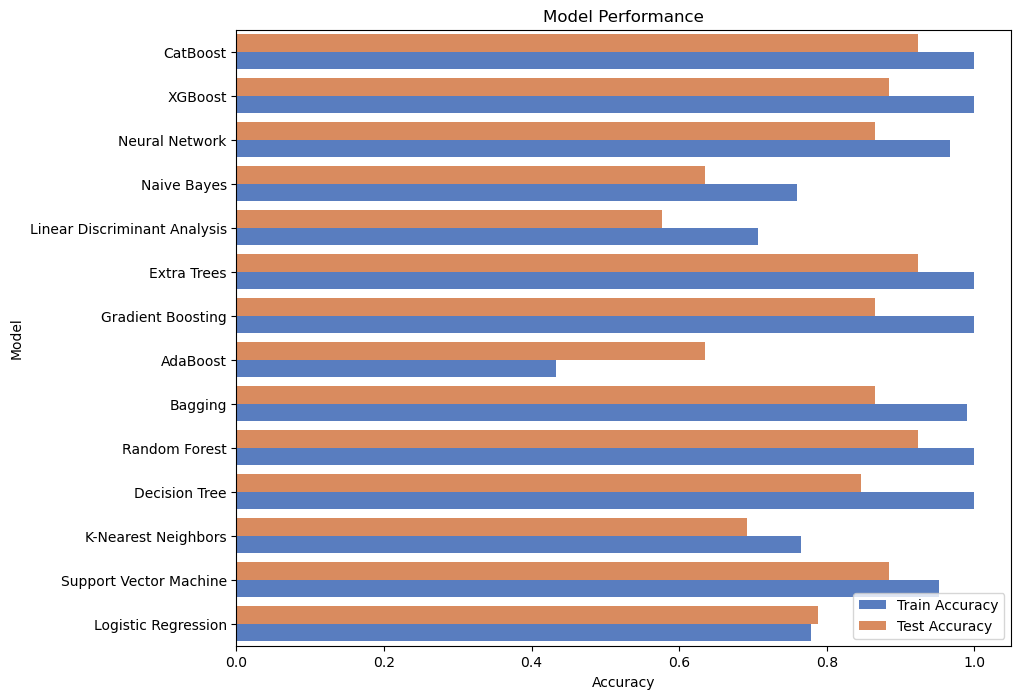

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    #'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}

# Loop through models and print train and test accuracy
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    print(f'{name}:\nTrain Accuracy: {train_acc:.4f}')
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    print(f'Testing Accuracy: {test_acc:.4f}\n')
    import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store model names, training accuracies, and testing accuracies
model_names = []
train_accuracies = []
test_accuracies = []

# Loop through models and calculate accuracies
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    
    # Append results to lists
    model_names.append(name)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Create a DataFrame for plotting
data = pd.DataFrame({'Model': model_names,
                     'Train Accuracy': train_accuracies,
                     'Test Accuracy': test_accuracies})

# Plotting the results using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(data=data.melt(id_vars='Model'), x='value', y='Model', hue='variable', palette='muted', orient='h')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend(title=None)
plt.gca().invert_yaxis()  # Invert y-axis to display the models in descending order
plt.show()


Logistic Regression:
Train Accuracy: 0.7788
Testing Accuracy: 0.7885

Support Vector Machine:
Train Accuracy: 0.9519
Testing Accuracy: 0.8846

K-Nearest Neighbors:
Train Accuracy: 0.7644
Testing Accuracy: 0.6923

Decision Tree:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Random Forest:
Train Accuracy: 1.0000
Testing Accuracy: 0.9038

Bagging:
Train Accuracy: 0.9952
Testing Accuracy: 0.8846

AdaBoost:
Train Accuracy: 0.4327
Testing Accuracy: 0.6346



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Gradient Boosting:
Train Accuracy: 1.0000
Testing Accuracy: 0.8654

Extra Trees:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231

Linear Discriminant Analysis:
Train Accuracy: 0.7067
Testing Accuracy: 0.5769

Naive Bayes:
Train Accuracy: 0.7596
Testing Accuracy: 0.6346

Neural Network:
Train Accuracy: 0.9519
Testing Accuracy: 0.8462



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


XGBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.8846

CatBoost:
Train Accuracy: 1.0000
Testing Accuracy: 0.9231



/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/pritikumari/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


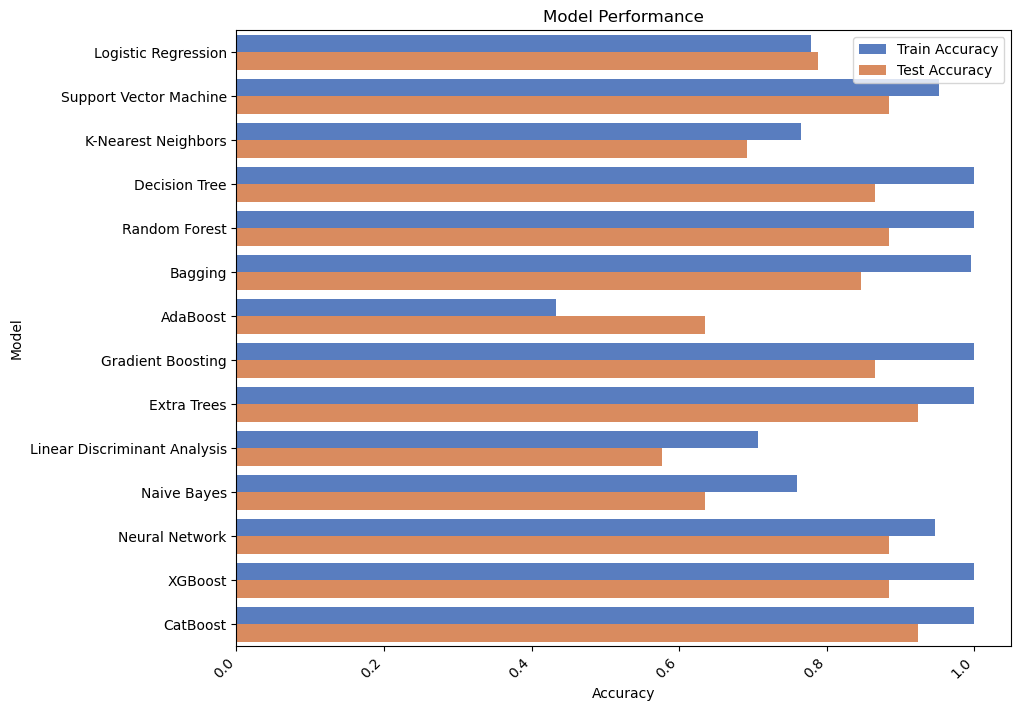

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Define dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Bagging': BaggingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Extra Trees': ExtraTreesClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Naive Bayes': GaussianNB(),
    'Neural Network': MLPClassifier(),
    'XGBoost': XGBClassifier(),
    #'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')
}

# Loop through models and print train and test accuracy
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    print(f'{name}:\nTrain Accuracy: {train_acc:.4f}')
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    print(f'Testing Accuracy: {test_acc:.4f}\n')
    import seaborn as sns
import matplotlib.pyplot as plt

# Lists to store model names, training accuracies, and testing accuracies
model_names = []
train_accuracies = []
test_accuracies = []

# Loop through models and calculate accuracies
for name, model in models.items():
    # Train the model
    model.fit(X_train, Y_train)
    
    # Predict on training data
    X_train_prediction = model.predict(X_train)
    train_acc = accuracy_score(X_train_prediction, Y_train)
    
    # Predict on testing data
    y_pred = model.predict(X_test)
    test_acc = accuracy_score(y_pred, Y_test)
    
    # Append results to lists
    model_names.append(name)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Create a DataFrame for plotting
data = pd.DataFrame({'Model': model_names,
                     'Train Accuracy': train_accuracies,
                     'Test Accuracy': test_accuracies})

# Plotting the results using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(data=data.melt(id_vars='Model'), x='value', y='Model', hue='variable', palette='muted', orient='h')
plt.xlabel('Accuracy')
plt.title('Model Performance')
plt.legend(title=None)
# plt.gca().invert_yaxis()
plt.xticks(rotation=45, ha='right')
# Invert y-axis to display the models in descending order
plt.show()


In [118]:
model=ExtraTreesClassifier()

In [119]:
model.fit(X_train,Y_train)

ExtraTreesClassifier()

In [120]:
X_train_prediction=model.predict(X_train)
training_accuracy=accuracy_score(X_train_prediction,Y_train)

In [121]:
training_accuracy

1.0

In [122]:
X_testing_prediction=model.predict(X_test)
testing_accuracy=accuracy_score(Y_test,X_testing_prediction)

In [123]:
testing_accuracy

0.9230769230769231

<Axes: >

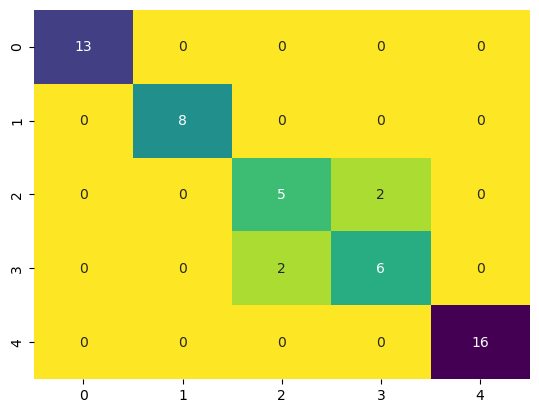

In [126]:
#confusion matrix for that
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(X_testing_prediction,Y_test)
sns.heatmap(cm, annot=True, cbar=False, cmap="viridis_r",
            yticklabels=model.classes_, xticklabels=model.classes_)

In [127]:
# Print the precision and recall, among other metrics
from sklearn import metrics
print(metrics.classification_report(Y_test, X_testing_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         8
           2       0.71      0.71      0.71         7
           3       0.75      0.75      0.75         8
           4       1.00      1.00      1.00        16

    accuracy                           0.92        52
   macro avg       0.89      0.89      0.89        52
weighted avg       0.92      0.92      0.92        52

